In [1]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt

In [2]:
# --- Physical constants ---
g = 9.80665 # gravitational acceleration, approx 9.81 m s^{-2}
Omega = 7.292115 * 10**(-5)  # Earth's angular velocity, rad/s

In [3]:
selection = input("Would you like to use a pretested input? Enter 'OWN' to use your own input, 'LARGE_GAUSSIAN' for a large-scale Gaussian bump, 'SMALL_GAUSSIAN' for a small-scale Gaussian bump. 'TSUNAMI' for the 2011 Tohoku tsunami.")

In [4]:
if selection == "TSUNAMI":
    Delta_x = 500 # meters
    Delta_y = Delta_x # meters
    Delta_t = 0.05 # seconds

    num_x = 451 # number of east-west grid points
    num_y = 501 # number of north-south grid points
    num_t = 18000 # number of time steps

    print(f"Total east-west distance: { Delta_x * (num_x - 1) } meters")
    print(f"Total north-south distance: { Delta_y * (num_y - 1) } meters")

elif selection == "SMALL_GAUSSIAN":
    Delta_x = 500 # meters
    Delta_y = Delta_x # meters
    Delta_t = 0.1 # seconds

    num_x = 451 # number of east-west grid points
    num_y = 501 # number of north-south grid points
    num_t = 4500 # number of time steps

    print(f"Total east-west distance: { Delta_x * (num_x - 1) } meters")
    print(f"Total north-south distance: { Delta_y * (num_y - 1) } meters")

elif selection == "LARGE_GAUSSIAN":
    Delta_x = 10**5 # 10^5 m = 100 km
    Delta_y = Delta_x
    Delta_t = 60 # seconds

    num_x = 254
    num_y = 50
    num_t = 720

    print(f'Forecast length: {Delta_t * num_t / 60 / 60} hours')
    print(f"Total east-west distance: { Delta_x * (num_x - 1) / 1000} kilometers")
    print(f"Total north-south distance: { Delta_y * (num_y - 1) / 1000} kilometers")

else:
    print("Set up grid spacing and time steps here.")
    # grid spacing must be in meters, and time steps must be in seconds, for compatibility with the rest of the code I wrote.
    
    # Delta_x 
    # Delta_y 
    # Delta_t

    # num_x
    # num_y
    # num_t

Total east-west distance: 225000 meters
Total north-south distance: 250000 meters


In [5]:
# x = [0, 1, 2, ..., num_x - 1] * Δx = [0, Δx, 2 * Δx, ..., (num_x - 1) * Δx]
x = np.arange(0, num_x) * Delta_x 
y = np.arange(0, num_y) * Delta_y

mean_x = np.mean(x)
mean_y = np.mean(y)

# When we refer to a position in a matrix, we specify the row first and the column second. Mathematically, we usually specify 'x' first and 'y' second. 'ij' indexing makes 'x' vary along rows and 'y' vary along columns. 
X, Y = np.meshgrid(x, y, indexing = 'ij') 

print('x-coordinate varies along rows')
print(X) # x varies along rows

print("\ny-coordinate varies along columns") 
print(Y) # y varies along columns

x-coordinate varies along rows
[[     0      0      0 ...      0      0      0]
 [   500    500    500 ...    500    500    500]
 [  1000   1000   1000 ...   1000   1000   1000]
 ...
 [224000 224000 224000 ... 224000 224000 224000]
 [224500 224500 224500 ... 224500 224500 224500]
 [225000 225000 225000 ... 225000 225000 225000]]

y-coordinate varies along columns
[[     0    500   1000 ... 249000 249500 250000]
 [     0    500   1000 ... 249000 249500 250000]
 [     0    500   1000 ... 249000 249500 250000]
 ...
 [     0    500   1000 ... 249000 249500 250000]
 [     0    500   1000 ... 249000 249500 250000]
 [     0    500   1000 ... 249000 249500 250000]]


In [6]:
# --- Setup eta(x, y, 0), the initial surface height --- 

# I consider z = 0 to be sea level.

if selection == "TSUNAMI":
    eta =  7 * np.exp(-(X - 70000)**2)
    smooth_south = np.where(Y <= 40000, np.exp(-((Y - 40000)/15000)**2), 1.0) # smooth the southern boundary
    smooth_north = np.where(Y >= 210000, np.exp(-((Y - 210000)/15000)**2), 1.0) # smooth the northern boundary
    eta = eta * smooth_south * smooth_north

elif selection == "SMALL_GAUSSIAN":
    sigma = 15000
    eta = 7 * np.exp(-((X - 70000)**2 / (2 * sigma**2) + (Y - 125000)**2 / (2 * sigma**2)))

elif selection == "LARGE_GAUSSIAN":
    std_pulse = 8.0 * Delta_y
    eta = 300.0 * np.exp(-((X - 0.25 * mean_x)**2 + (Y - mean_y)**2) / (2.0 * std_pulse**2)) # eta = upper surface

else:
    print("Set the initial surface height here.")

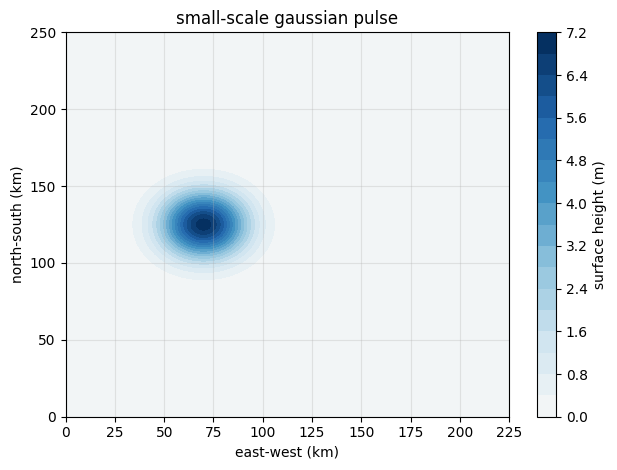

In [7]:
if selection == "TSUNAMI":
    contour = plt.contourf(X / 1000, Y / 1000, eta, levels = 20, cmap = 'RdBu', vmin = -7, vmax = 7) # the x-y units are kilometers
    plt.colorbar(contour, label = 'surface height (m)')
    plt.xlabel('east-west (km)')
    plt.ylabel('north-south (km)')
    # plt.xlim(65, 75)
    plt.title("tsunami upthrust")
    plt.grid(True, alpha = 0.3)
    plt.tight_layout()
    plt.show()
    
elif selection == "SMALL_GAUSSIAN":
    contour = plt.contourf(X / 1000, Y / 1000, eta, levels = 20, cmap = 'RdBu', vmin = -7, vmax = 7)
    plt.colorbar(contour, label = 'surface height (m)')
    plt.xlabel('east-west (km)')
    plt.ylabel('north-south (km)')
    plt.title("small-scale gaussian pulse")
    plt.grid(True, alpha = 0.3)
    plt.tight_layout()
    plt.show()

elif selection == "LARGE_GAUSSIAN":
    contour = plt.contourf(X / 1000, Y / 1000, eta, levels = 20, cmap = 'RdBu', vmin = -300, vmax = 300)
    plt.colorbar(contour, label = 'surface height (m)')
    plt.xlabel('east-west (km)')
    plt.ylabel('north-south (km)')
    plt.title(f'large-scale gaussian pulse')
    plt.grid(True, alpha = 0.3)
    plt.tight_layout()
    plt.show()
else: 
    print("plotting code goes here.")

In [8]:
# set up b(x y), the sea bottom topography
if selection == "TSUNAMI":
    b = np.zeros((num_x, num_y)) - 500 # flat sea floor
    b = np.where(X <= 70000, -.014 * X, -987)

elif selection == "SMALL_GAUSSIAN":
    b = np.zeros((num_x, num_y)) - 1000 # flat sea floor

elif selection == "LARGE_GAUSSIAN":
     b = np.zeros((num_x, num_y)) - 3500 # flat sea floor
else:
    print("set bottom topography here.")

In [9]:
# You can print your bottom topography here, to verify that you have set it up correctly.
if selection == "TSUNAMI":
    contour = plt.contourf(X / 1000, Y / 1000, b, cmap = 'RdBu', levels = 20, vmin = -987, vmax = 0)
    plt.colorbar(contour, label='bottom (m)')
    plt.xlabel('east-west (km)')
    plt.ylabel('north-south (km)')
    plt.title('bottom topography')
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

elif selection == "SMALL_GAUSSIAN":
    print("flat bottom - no plot necessary")

elif selection == "LARGE_GAUSSIAN":
    print("flat bottom - no plot necessary")

else:
    print("set vmin and vmax")
    # vmin
    # vmax

flat bottom - no plot necessary


In [10]:
# --- Coriolis Force ---
f = np.zeros((num_x, num_y)) 

if selection == "TSUNAMI":
    latitude = 38

elif selection == "SMALL_GAUSSIAN":
    latitude = 45

elif selection == "LARGE_GAUSSIAN":
    latitude = 45

else:
    print("set the latitude for the center of your system here.")
    # latitude = 

# --- beta plane
f_0 = 2 * Omega * np.sin(np.radians(latitude))
beta = 1e-10
f = f_0 + beta * (Y - mean_y)

In [11]:
# initialize velocity field, unit = meters per second
u = np.zeros((num_x, num_y))
v = np.zeros((num_x, num_y))

In [12]:
add_noise = False

if add_noise:
    eta += np.random.random(eta.shape) - 0.5
    u += np.random.random(u.shape) - 0.5 
    v += + np.random.random(v.shape) - 0.5
    b += np.random.random(b.shape) - 0.5

In [13]:
h = eta - b

In [14]:
import finite_vol as fv

In [15]:
# create one plot for every n_ouput timesteps

if selection == "TSUNAMI":
    n_output = 200

elif selection == "SMALL_GAUSSIAN":
    n_output = 200

elif selection == "LARGE_GAUSSIAN":
    n_output = 15

else:
    print("set n_output here")
    # n_output = 
    
i = 0 # name the plot

In [ ]:
for n in range(0, num_t):
    #sources
    S_u = f[1:-1, 1:-1] * v[1:-1, 1:-1] - g * (b[2:,1:-1] - b[0:-2,1:-1]) / (2 * Delta_x)
    S_v = -f[1:-1, 1:-1] * u[1:-1, 1:-1] - g * (b[1:-1,2:] - b[1:-1,0:-2]) / (2 * Delta_y)

    (unew, vnew, h_new) = fv.finite_vol(Delta_x, Delta_y, Delta_t, g, u, v, h, S_u, S_v)
    u[1:-1, 1:-1] = unew
    v[1:-1, 1:-1] = vnew
    h[1:-1, 1:-1] = h_new

    if np.mod(n, n_output) == 0:
        i += 1
        eta = b + h #update surface

        # plotting
        if selection == "TSUNAMI":
            contour = plt.contourf(X / 1000, Y / 1000, eta, levels=20, cmap='RdBu', vmin=-5, vmax=5)
            plt.colorbar(contour, label='surface height (m)')
            plt.xlabel('east-west (km)')
            plt.ylabel('north-south (km)')
            plt.title(f'surface after {Delta_t * n} seconds')
            plt.grid(True, alpha = 0.3)

            # save figure
            plt.savefig(f'surface_{i}.png', dpi=150, bbox_inches='tight')
            plt.close()

        elif selection == "SMALL_GAUSSIAN":
            contour = plt.contourf(X / 1000, Y / 1000, eta, levels=20, cmap='RdBu', vmin = -5, vmax=5)
            plt.colorbar(contour, label='surface height (m)')
            plt.xlabel('east-west (km)')
            plt.ylabel('north-south (km)')
            plt.title(f'surface after {Delta_t * n} seconds')
            plt.grid(True, alpha = 0.3)

            # save figure
            plt.savefig(f'surface_{i}.png', dpi=150, bbox_inches='tight')
            plt.close()

        elif selection == "LARGE_GAUSSIAN":
            max_u = np.sqrt(np.max(u**2 + v**2)) 

            contour = plt.contourf(X / 1000, Y / 1000, eta, levels=20, cmap='RdBu', vmin = -100, vmax = 100)
            plt.colorbar(contour, label = 'surface height (m)')
            
            # Add quiver plot for velocity (optional)
            quiver_step = 5  # Plot every 5th arrow for clarity
            plt.quiver(X[::quiver_step, ::quiver_step] / 1000, 
                    Y[::quiver_step, ::quiver_step] / 1000,
                    u[::quiver_step, ::quiver_step],
                    v[::quiver_step, ::quiver_step],
                    scale = 100, color = 'black')

            plt.xlabel('east-west (km)')
            plt.ylabel('north-south (km)')
            plt.title(f'surface height at t = {n * Delta_t / 3600. : .2f} hours\nmax velocity = {max_u:.2f} m/s')
            plt.grid(True, alpha = 0.3)
            
            # save figure
            plt.savefig(f'surface_{i}.png', dpi = 150, bbox_inches = 'tight')
            plt.close()

        else: 
            print("set up your plotting here.")

    # boundary conditions    

    # # first x-slice
    # u[0, 1:-1] = unew[-1, :]
    # u[0, 0] = unew[-1, 0]
    # u[0, -1] = unew[-1, -1]
    # v[0, 1:-1] = vnew[-1, :]
    # v[0, 0] = vnew[-1, 0]
    # v[0, -1] = vnew[-1, -1]
    # # last x-slice
    # u[-1, 1:-1] = unew[1, :]
    # u[-1 ,0] = unew[1, 0]
    # u[-1, -1] = unew[1, -1]
    # v[-1, 1:-1] = vnew[1, :]
    # v[-1, 0] = vnew[1, 0]
    # v[-1, -1] = vnew[1, -1]

    # # # first y-slice
    # # u[1:-2, 0] = unew[0:-1, -1]
    # # v[1:-2, 0] = vnew[0:-1, -1]

    # # #last y-slice
    # # u[1:-2, -1] = unew[0:-1, 0]
    # # v[1:-2, -1] = vnew[0:-1, 0]

    # # no flux from north / south
    # v[:,[0,-1]]=0.
    
    # # first x-slice
    # h[0,1:-1]=h_new[-1,:]
    # # last x-slice
    # h[-1,1:-1]=h_new[1,:]

    # #first y-slice
    # h[1:-2, 0] = h_new[0:-1, -1]
    # #last y-slice
    # h[1:-2, -1] = h_new[0:-1, 0]

    # #v2
    # # East-West Periodic (existing)
    # u[0, 1:-1] = unew[-1, :]   # First x-slice = Last x-slice
    # u[-1, 1:-1] = unew[1, :]    # Last x-slice = First x-slice
    # v[0, 1:-1] = vnew[-1, :]    # Repeat for v
    # v[-1, 1:-1] = vnew[1, :]

    # # North-South Periodic (new)
    # u[1:-1, 0] = unew[:, -1]     # First y-slice = Last y-slice
    # u[1:-1, -1] = unew[:, 1]     # Last y-slice = First y-slice
    # v[1:-1, 0] = vnew[:, -1]     # Repeat for v
    # v[1:-1, -1] = vnew[:, 1]